# NETFLIX MOVIE DATA ANALYSIS PROJECT:

- Q1. What is the most frequent genre of movies released on Netflix?
- Q2. What genres have highest votes?
- Q3. Which movie got the highest popularity? What's its genre?
- Q4. What movie got the lowest popularity? What's its genre?
- Q5. Which year has the most filmed movies?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [9]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [11]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [17]:
df.duplicated().sum()

0

In [19]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploratory Summary:
- We have a daatset of 9827 rows and 9 columns
- Our dataset looks a bit tide with no NaNs and duplicated values
- Release date column needs to be casted to date time with extracting year only
- Colums : overview, original language and poster url are not useful and need to be dropped to make the dataset look tidier
- There is noticeable outliers in popularity column
- Vote_Average better be categorised for proper result
- Genre column has comma seperated values and white spaces that need to be handled and casted into category. Exploration summary
                            


In [22]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [24]:
df['Release_Date']=df['Release_Date'].dt.year
print(df['Release_Date'].dtypes)

int32


In [26]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping Columns

In [29]:
cols=['Overview','Original_Language','Poster_Url']

In [31]:
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**Categorize The Vote_Average column**

We are categorizing the Vote_Average column into four labels namely: popular, average, below_average, not_popular using categorize_col() function.

In [36]:
def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [38]:
labels=['Not_Popular','Below_Average','Average','Popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['Popular', 'Below_Average', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Average' < 'Average' < 'Popular']

In [40]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [42]:
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular      2467
Popular          2450
Average          2412
Below_Average    2398
Name: count, dtype: int64

In [44]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [46]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


**We will now split the Genre column into one Genre per row.**

In [49]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


**Casting column Genre into Category**

In [52]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [56]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [58]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# Data Visualisation

In [61]:
sns.set_style('whitegrid')

**What is the most frequent genre of movies released on Netflix?**

In [64]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

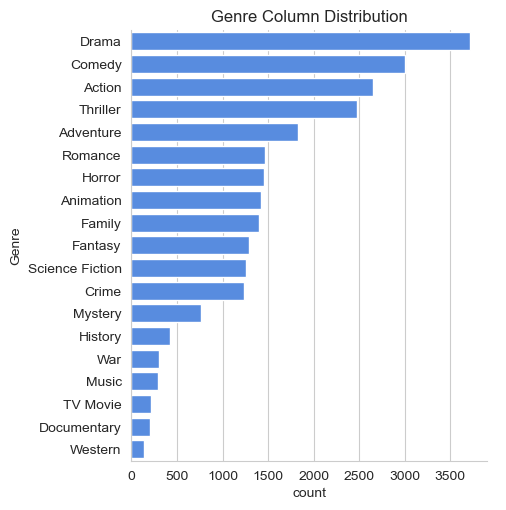

In [66]:
sns.catplot(y='Genre',data=df,kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')
plt.title("Genre Column Distribution")
plt.show()

**What Genres have highest votes?**

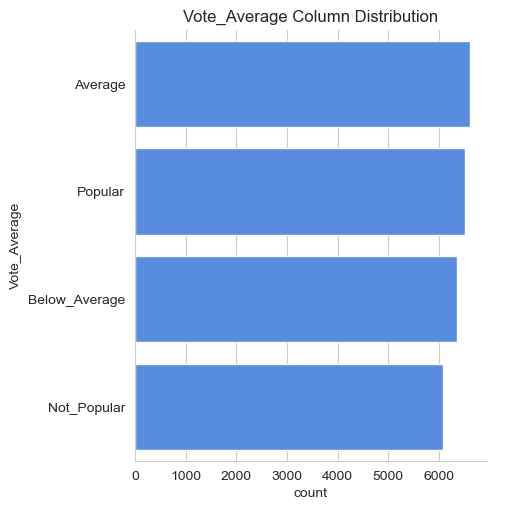

In [69]:
sns.catplot(y='Vote_Average',data=df,kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='#4287f5')
plt.title('Vote_Average Column Distribution')
plt.show()

**Which movie got the highest popularity? What's its genre?**

In [72]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure


In [74]:
df[df['Popularity']==df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


**What movie got the lowest popularity? What's its genre?**

In [77]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


**Which year has the most filmed movies?**

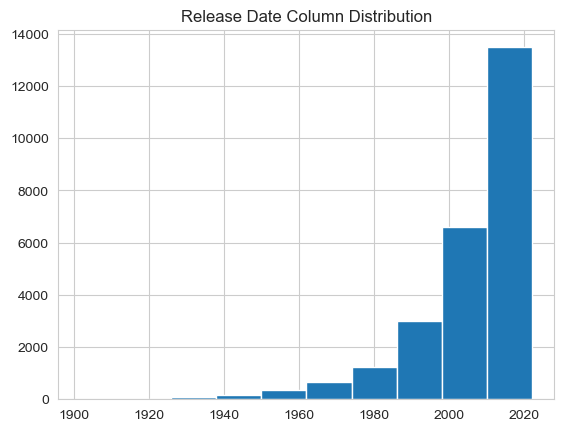

In [80]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

# SUMMARY:

Q1: What is the most frequent genre in the dataset?
- Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

Q2: What genres has highest votes?
- We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by having more than 18.5% of movies' popularities.

Q3: What movie got the highest popularity? What’s its genre?
- Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure, and Science Fiction.

Q3 (again): What movie got the lowest popularity? What’s its genre?
- The United States, Thread has the lowest popularity rate in our dataset and it has genres of Music, Drama, War, Sci-Fi, and History.

Q4: Which year has the most filmed movies?
- Year 2020 has the highest filming rate in our dataset.

In [83]:
df['is_popular'] = df['Vote_Average'].apply(lambda x: 1 if x == 'Popular' else 0)

In [85]:
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [87]:
from sklearn.model_selection import train_test_split
X = df.drop(['Title', 'Vote_Average', 'is_popular'], axis=1)
y = df['is_popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7912861987998956
Confusion Matrix:
 [[5333  426]
 [1174  733]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      5759
           1       0.63      0.38      0.48      1907

    accuracy                           0.79      7666
   macro avg       0.73      0.66      0.67      7666
weighted avg       0.77      0.79      0.77      7666



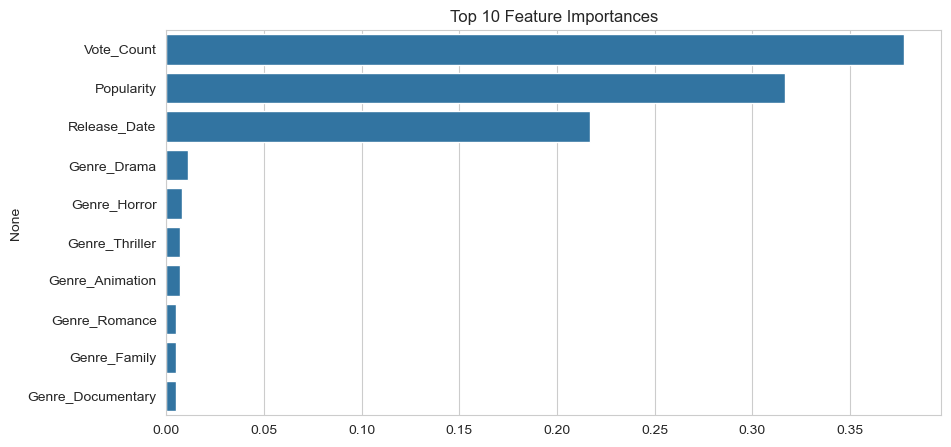

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances")
plt.show()

In [93]:
y_test 
y_pred  

array([0, 0, 1, ..., 0, 0, 0])

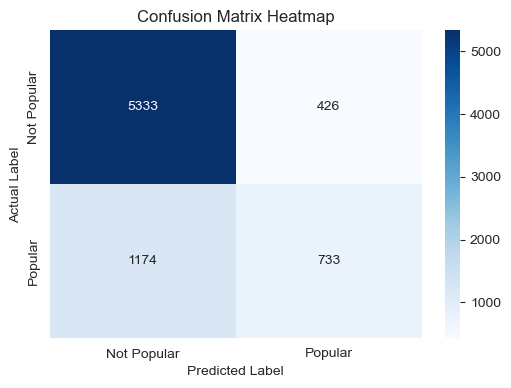

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Popular', 'Popular'], 
            yticklabels=['Not Popular', 'Popular'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [97]:
def predict_popularity(model, release_year, vote_count, popularity_score, genre_dict, feature_columns):
    input_data = {
        'Release_Date': release_year,
        'Vote_Count': vote_count,
        'Popularity': popularity_score
    }
    for col in feature_columns:
        if col.startswith('Genre_'):
            input_data[col] = genre_dict.get(col, 0)
    df_input = pd.DataFrame([input_data])
    df_input = df_input[feature_columns]
    pred = model.predict(df_input)[0]
    return "HIT" if pred == 1 else "FLOP"


In [101]:
predict_popularity(
    model,
    release_year=2023,
    vote_count=7000,
    popularity_score=2500,
    genre_dict={'Genre_Action': 1, 'Genre_Thriller': 1},
    feature_columns=X_train.columns
)


'HIT'

In [103]:
predict_popularity(
    model,
    release_year=2020,
    vote_count=350,
    popularity_score=420,
    genre_dict={'Genre_Drama': 1},
    feature_columns=X_train.columns
)


'FLOP'

# CONCLUSION

In this project, we performed an end-to-end data analysis and prediction on Netflix movies using a dataset of over 9,415 titles. The objective was to explore patterns in movie features and build a machine learning model to predict whether a movie would be a HIT or a FLOP, based on key attributes.

- Drama was the most frequent genre.
- 2020 had the highest number of movie releases.
- Spider-Man: No Way Home had the highest popularity score.
- Vote Count and Popularity Score were strong indicators of a movie's success.

**ML :**
- A Random Forest Classifier was trained using features such as Release Year, Vote Count, Popularity, and one-hot encoded Genres.
- The model achieved strong performance on the test set and was able to classify movies into Hit or Flop.

This project demonstrates the practical application of data science from cleaning and exploring real-world data to building a predictive model and interpreting results. The model can serve as a foundational tool for making data-driven decisions in the entertainment industry, such as content investment or promotional targeting.
